In [16]:
import requests
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [2]:
def get_data(url):
    response = requests.get(url)
    data = response.json()
    return data

## 1.Get the location of sensors

In [11]:
url = 'https://api.glasgow.gov.uk/traffic/v1/movement/sites'
data = get_data(url)

#Convert dict to df
data_dict = {}
data_dict['id'] = [each_record['siteId'] for each_record in data]
data_dict['description'] = [each_record['from']['description'] for each_record in data]
data_dict['latitude'] = [each_record['from']['lat'] for each_record in data]
data_dict['longitude'] = [each_record['from']['long'] for each_record in data]
sensors_df = pd.DataFrame.from_dict(data_dict)
sensors_df

id                                    description  \
0     GH020A_B                    Gallowgate west to Sword St   
1     GJ3301_D                       Carmunnock Rd southbound   
2     GH020A_A                    Gallowgate east to Sword St   
3     GJ3301_C  Carmunnock Rd northbound to Kings Park Avenue   
4     GJ3301_B      Kings Park Ave westbound to Carmunnock Rd   
...        ...                                            ...   
1270  GL1851_S                        PRW from tweedsmuir w/b   
1271  GJ011A_V          Aikenhead Road northbound to Dixon Rd   
1272  GA4771_V                    Glassford Street Northbound   
1273  GJ011A_T          Aikenhead Road southbound to Dixon Rd   
1274  GA4771_T                    Glassford Street Southbound   

                latitude            longitude  
0       55.8543754827825   -4.217259197086495  
1     55.821736212748405  -4.2561270616272875  
2      55.85539015389372   -4.225769520669405  
3      55.81925458152306   -4.255696036412074  
4     55.820288451422314   -4.250775113480551  
...                  ...                  ...  
1270  55.845768181789424   -4.355396486903399  
1271   55.83169902330712   -4.248512176194785  
1272  55.857648657839455    -4.24934030262111  
1273  55.835226792673474   -4.248747790943153  
1274   55.85969518557228   -4.248499802037326  

[1275 rows x 4 columns]

## Map the sensors

In [14]:
# Create a GeoDataFrame
sensors_df["geometry"] = gpd.points_from_xy(sensors_df["longitude"], sensors_df["latitude"])
# set coordinates to WGS84
sensors_gdf = gpd.GeoDataFrame(sensors_df, crs="epsg:4326")
# #Reproject
sensors_gdf = sensors_gdf.to_crs("3857")
sensors_gdf

id                                    description  \
0     GH020A_B                    Gallowgate west to Sword St   
1     GJ3301_D                       Carmunnock Rd southbound   
2     GH020A_A                    Gallowgate east to Sword St   
3     GJ3301_C  Carmunnock Rd northbound to Kings Park Avenue   
4     GJ3301_B      Kings Park Ave westbound to Carmunnock Rd   
...        ...                                            ...   
1270  GL1851_S                        PRW from tweedsmuir w/b   
1271  GJ011A_V          Aikenhead Road northbound to Dixon Rd   
1272  GA4771_V                    Glassford Street Northbound   
1273  GJ011A_T          Aikenhead Road southbound to Dixon Rd   
1274  GA4771_T                    Glassford Street Southbound   

                latitude            longitude                         geometry  
0       55.8543754827825   -4.217259197086495  POINT (-469463.146 7529480.384)  
1     55.821736212748405  -4.2561270616272875  POINT (-473789.897 7523009.916)  
2      55.85539015389372   -4.225769520669405  POINT (-470410.511 7529681.621)  
3      55.81925458152306   -4.255696036412074  POINT (-473741.916 7522518.175)  
4     55.820288451422314   -4.250775113480551  POINT (-473194.121 7522723.035)  
...                  ...                  ...                              ...  
1270  55.845768181789424   -4.355396486903399  POINT (-484840.519 7527773.530)  
1271   55.83169902330712   -4.248512176194785  POINT (-472942.212 7524984.386)  
1272  55.857648657839455    -4.24934030262111  POINT (-473034.399 7530129.564)  
1273  55.835226792673474   -4.248747790943153  POINT (-472968.441 7525683.655)  
1274   55.85969518557228   -4.248499802037326  POINT (-472940.835 7530535.487)  

[1275 rows x 5 columns]

#### Filter the sensors

In [18]:
borough_uk = gpd.read_file('data/district_borough_unitary.shp')
borough_gla = borough_uk.loc[borough_uk['Name']=='Glasgow City'].to_crs("3857")

sensor_join = gpd.sjoin(sensors_gdf, borough_gla, how ='inner', op ='within')

E:\program\anaconda\Lib\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


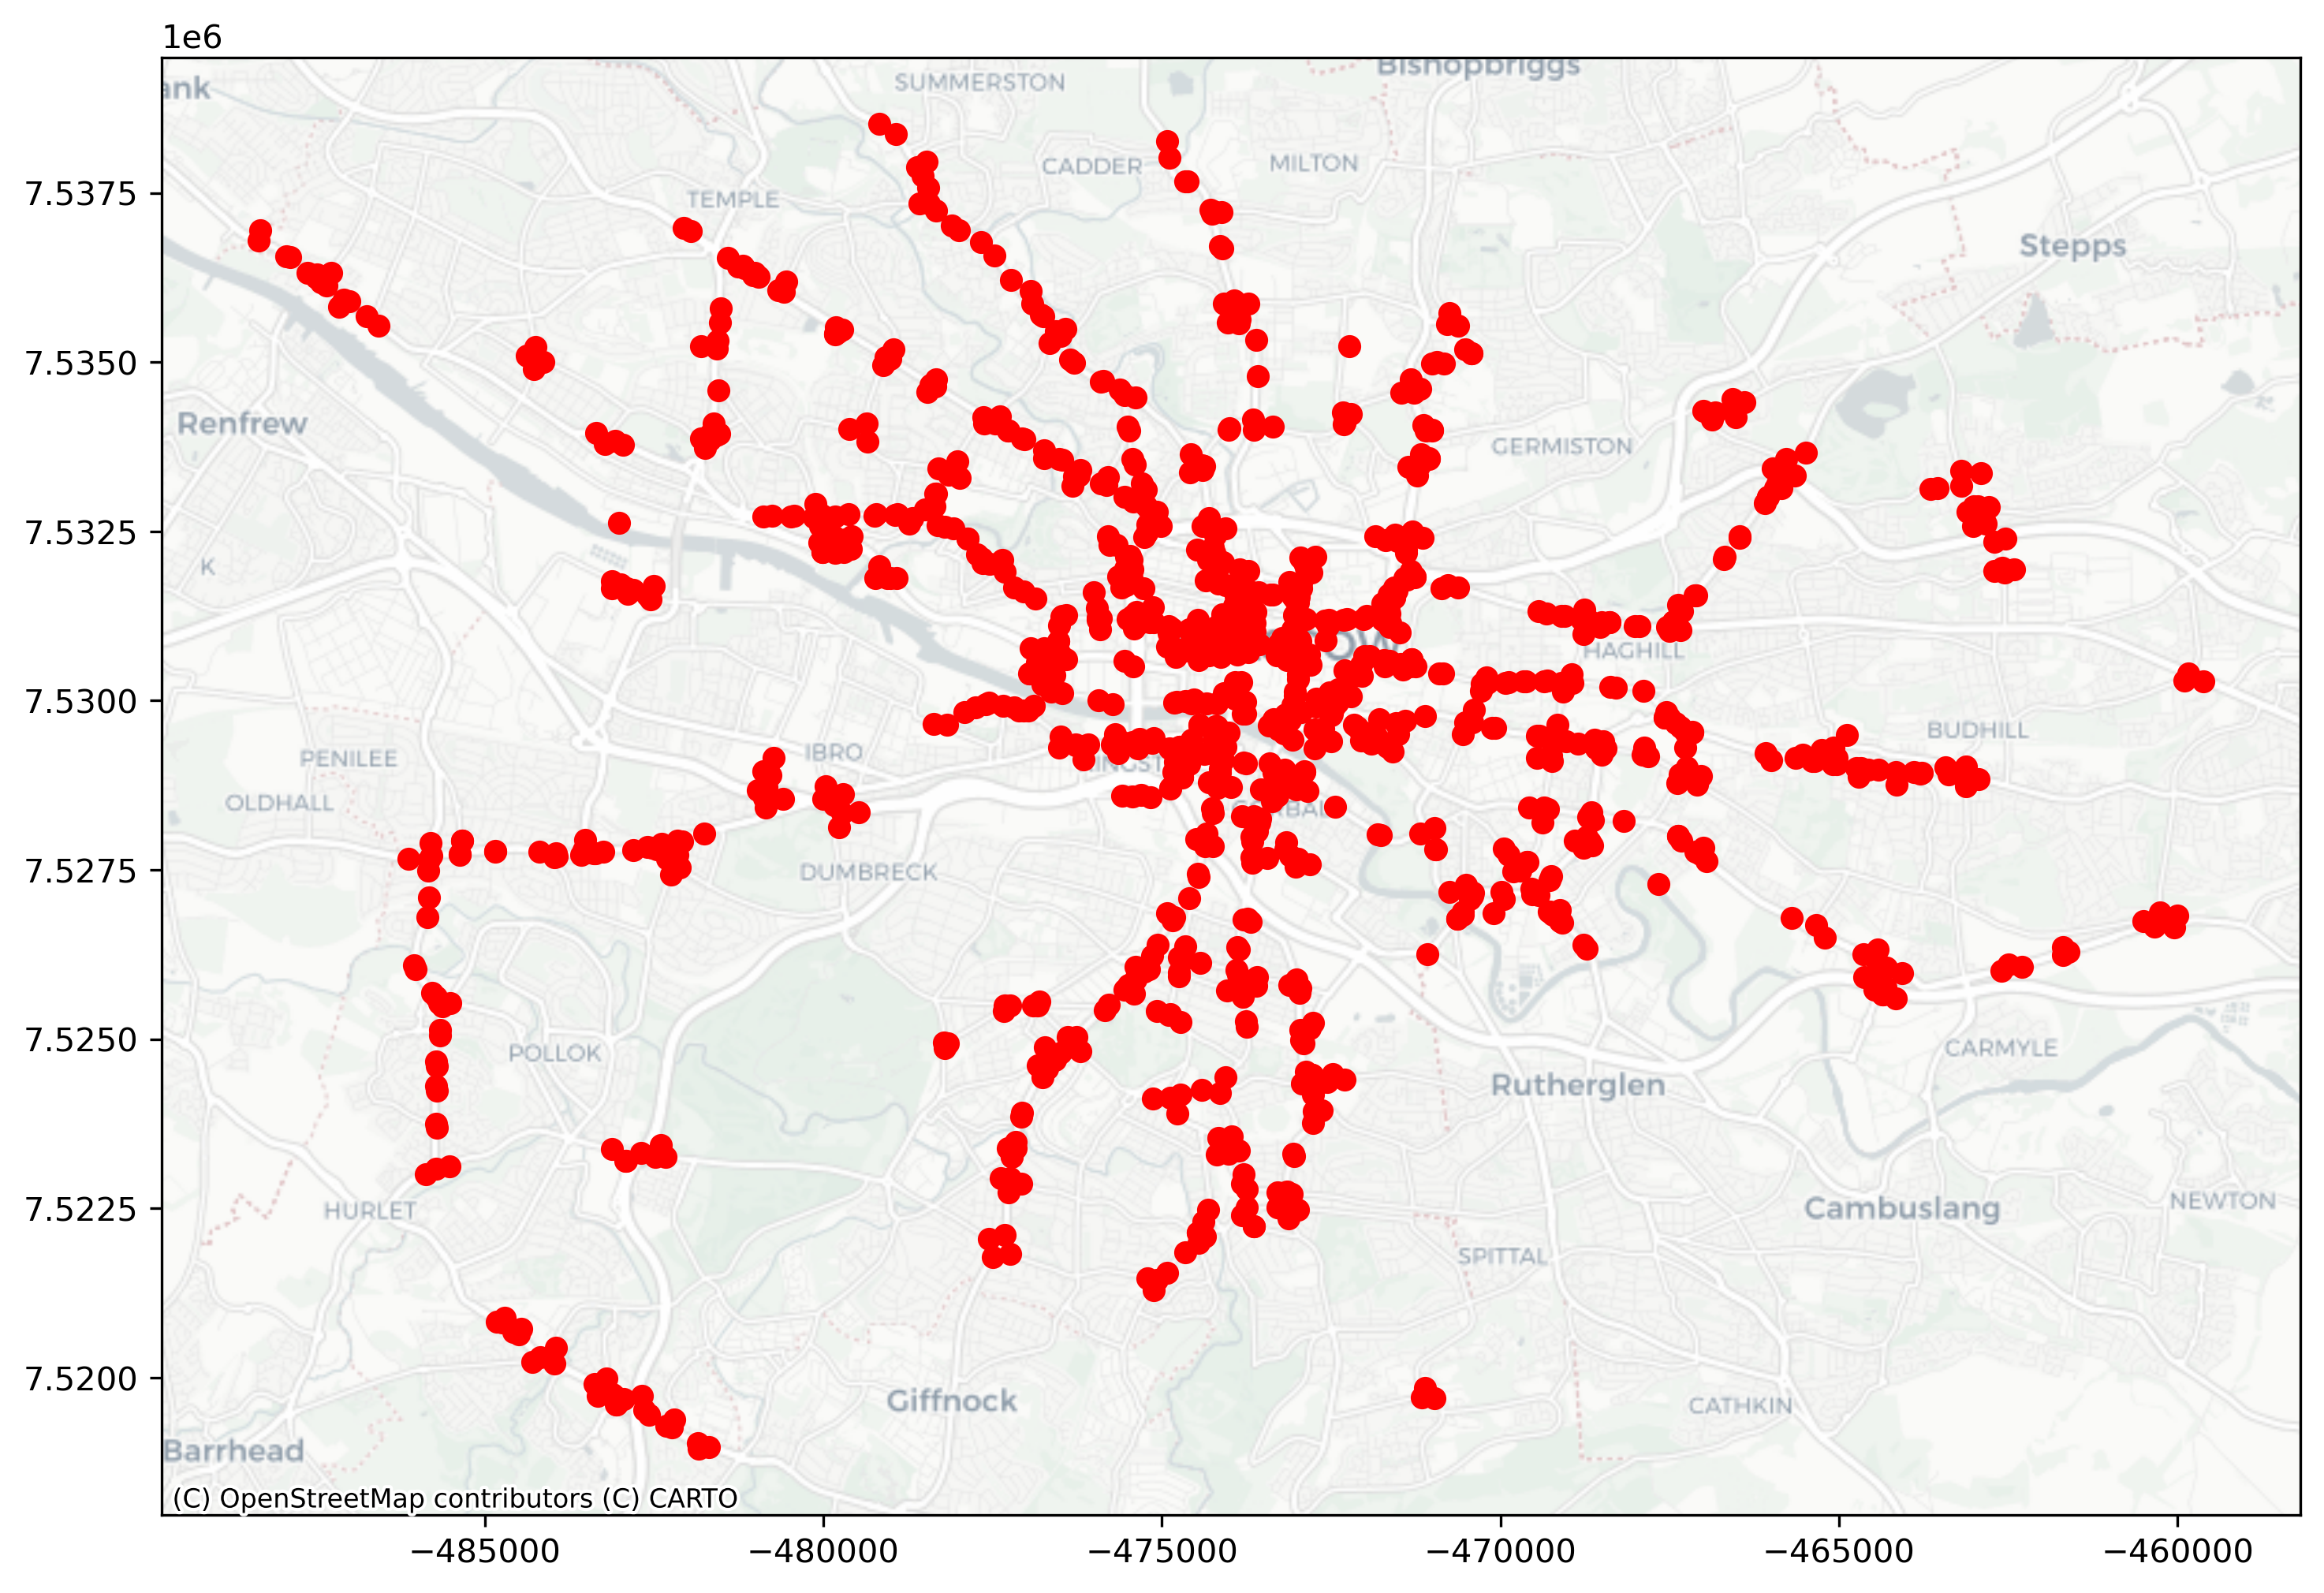

In [28]:
fig, ax = plt.subplots(figsize=(12,8), dpi=300) 
#Plot the data
sensor_join.plot(color = 'red',ax=ax)
#Add basemap
ctx.add_basemap(ax, crs="EPSG:3857", source=ctx.providers.CartoDB.Positron)

In [29]:
sensor_join.explore(color="red",tiles='cartodbpositron', tooltip=['id','description','latitude','longitude'], 
                    width=750, height=500)